In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# DecisionTreeClassifier (Arbol de decisiones)
# LogisticRegression (Regresión Logística)
# SVC (SVM)

# SGDClassifier (Descenso de Gradiente Estocástico)
# GaussianNB (Gaussian Naive Bayes)

In [ ]:
# Creamos una lista de los nombres de la base de datos para luego mostrarlos en los resultados
db_names = ['Balance Database',
            'Car Database',
            'Dermatology Database',
            'Ecoli Database',
            'Hepatitis Database',
            'Mammographic Database',
            'Nursery Database',
            'Saheart Database',
            'Wine Database',
            'Zoo Database']

In [132]:
###### Cargamos las 10 bases de datos ######

# Creamos un array de base de datos
dataBase_list = []

# BALANCE
df = pd.read_csv('balance.csv').astype('category').apply(lambda x: x.cat.codes) # ver si es necesario esto siempre
dataBase_list.append(df)

# CAR
df = pd.read_csv('car.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

# DERMATOLOGY
df = pd.read_csv('dermatology.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

# ECOLI
df = pd.read_csv('ecoli.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

# HEPATITIS
df = pd.read_csv('hepatitis.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

# MAMMOGRAPHIC
df = pd.read_csv('mammographic.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

# NURSERY
df = pd.read_csv('nursery.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

# SAHEART
df = pd.read_csv('saheart.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

# WINE
df = pd.read_csv('wine.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

# ZOO
df = pd.read_csv('zoo.csv').astype('category').apply(lambda x: x.cat.codes)
dataBase_list.append(df)

In [ ]:
# Creamos una lista de target
target_list = ['Balance_scale','Acceptability','Class','Site','Class','Severity','Class','Chd','Class','Type']

# Creamos una lista de labels
labels_list = []
# Creamos una lista de features
features_list = []

for i in range(len(dataBase_list)):
  target = target_list[i]
  df = dataBase_list[i]

  label = np.array(df[target])
  labels_list.append(label)

  features = np.array(df.drop(target, axis=1))
  features_list.append(features)

  print("################",db_names[i],"################\n")
  # muestra las dimensiones rows x columns (caracteristicas)
  print("Features Shape:",features.shape)
  # muestra las dimensiones para la columna Clase
  print("Label Shape:",label.shape) 
  print()

################ Balance Database ################

Features Shape: (625, 4)
Label Shape: (625,)

################ Car Database ################

Features Shape: (1728, 6)
Label Shape: (1728,)

################ Dermatology Database ################

Features Shape: (358, 34)
Label Shape: (358,)

################ Ecoli Database ################

Features Shape: (336, 7)
Label Shape: (336,)

################ Hepatitis Database ################

Features Shape: (80, 19)
Label Shape: (80,)

################ Mammographic Database ################

Features Shape: (830, 5)
Label Shape: (830,)

################ Nursery Database ################

Features Shape: (12960, 8)
Label Shape: (12960,)

################ Saheart Database ################

Features Shape: (462, 9)
Label Shape: (462,)

################ Wine Database ################

Features Shape: (178, 13)
Label Shape: (178,)

################ Zoo Database ################

Features Shape: (101, 16)
Label Shape: (101,)



In [179]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) # Regresion Logistica
models.append(('DTC', DecisionTreeClassifier(criterion='entropy', splitter='random',  max_depth=3, random_state=1))) # Arbol de Decisiones
models.append(('SVM', SVC())) # SVM
models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-3))) # Descenso de Gradiente Estocástico
models.append(('NB', GaussianNB())) # Gaussian Naive Bayes

In [181]:
# Analiza cada base de datos para cada modelo

results = []
results2 = []

for i in range(len(dataBase_list)):

  # Recorremos cada features y label
  features = features_list[i]
  label = labels_list[i]

  print("################",db_names[i],"################\n")
  print("Algoritmo \tPromedio\tDesviación E.")

  # genera 10 folds
  kfold = model_selection.KFold(n_splits=10) 
  # para medir el accuracy
  scoring = 'accuracy' 

  for name, model in models:
    # realizamos validacion cruza en los 10 folds para cada uno de los modelos especificados
    cv_results = model_selection.cross_val_score(model, features, label, cv=kfold, scoring=scoring) 

    # Hallamos el promedio y desviación estándar para cada resultado
    promedio = cv_results.mean()
    dev_standar = cv_results.std()

    print("%s:\t\t %f\t (%f)" % (name, promedio, dev_standar))
    
    results.append(promedio)
    results2.append(dev_standar)



################ Balance Database ################

Algoritmo 	Promedio	Desviación E.
LR:		 0.857706	 (0.041621)
DTC:		 0.630005	 (0.118027)
SVM:		 0.902509	 (0.024918)
SGD:		 0.880005	 (0.055986)
NB:		 0.884818	 (0.024452)
################ Car Database ################

Algoritmo 	Promedio	Desviación E.
LR:		 0.653804	 (0.086100)
DTC:		 0.632451	 (0.062446)
SVM:		 0.771972	 (0.046661)
SGD:		 0.639353	 (0.067771)
NB:		 0.602396	 (0.032113)
################ Dermatology Database ################

Algoritmo 	Promedio	Desviación E.
LR:		 0.972063	 (0.032869)
DTC:		 0.768254	 (0.085051)
SVM:		 0.775873	 (0.102709)
SGD:		 0.935873	 (0.064547)
NB:		 0.877619	 (0.079606)
################ Ecoli Database ################

Algoritmo 	Promedio	Desviación E.
LR:		 0.654635	 (0.256724)
DTC:		 0.577184	 (0.398821)
SVM:		 0.711141	 (0.262601)
SGD:		 0.443761	 (0.257935)
NB:		 0.732709	 (0.200315)
################ Hepatitis Database ################

Algoritmo 	Promedio	Desviación E.
LR:		 0.837500	 (0

In [183]:
# Guardamos el promedio de cada modelo para cada base de datos
LR_list = [ results[i] for i in range(0,len(results),5)]
CART_list = [ results[i] for i in range(1,len(results),5)]
SVM_list = [ results[i] for i in range(2,len(results),5)]
SGD_list = [ results[i] for i in range(3,len(results),5)]
NB_list= [ results[i] for i in range(4,len(results),5)]

# Guardamos la desviación estándar de cada modelo para cada base de datos
LR_list2 = [ results2[i] for i in range(0,len(results),5)]
CART_list2 = [ results2[i] for i in range(1,len(results),5)]
SVM_list2 = [ results2[i] for i in range(2,len(results),5)]
SGD_list2 = [ results2[i] for i in range(3,len(results),5)]
NB_list2 = [ results2[i] for i in range(4,len(results),5)]

print(LR_list)
print(CART_list)
print(SVM_list)
print(SGD_list)
print(NB_list)
print()
print(LR_list2)
print(CART_list2)
print(SVM_list2)
print(SGD_list2)
print(NB_list2)

[0.8577060931899639, 0.6538042747681139, 0.9720634920634922, 0.6546345811051694, 0.8375, 0.8180722891566266, 0.720679012345679, 0.7186864014801111, 0.9277777777777778, 0.9209090909090911]
[0.630005120327701, 0.6324505981986825, 0.7682539682539682, 0.5771836007130124, 0.8875, 0.8132530120481928, 0.648533950617284, 0.7274745605920444, 0.8539215686274509, 0.8099999999999999]
[0.9025089605734766, 0.7719720392525877, 0.7758730158730158, 0.7111408199643494, 0.8375, 0.7927710843373494, 0.9420524691358025, 0.6882978723404254, 0.9607843137254903, 0.93]
[0.880005120327701, 0.6393534077160907, 0.935873015873016, 0.4437611408199643, 0.775, 0.6963855421686747, 0.7659722222222223, 0.5668825161887141, 0.8931372549019608, 0.96]
[0.8848182283666155, 0.6023961553972307, 0.8776190476190477, 0.7327094474153298, 0.5625, 0.8156626506024096, 0.6049382716049383, 0.69477335800185, 0.9663398692810456, 0.95]

[0.04162117828151968, 0.08610009760342875, 0.032868643029997605, 0.2567235592422802, 0.158607219255619, 

Text(0.5, 0.98, 'Gaussian Naive Bayes')

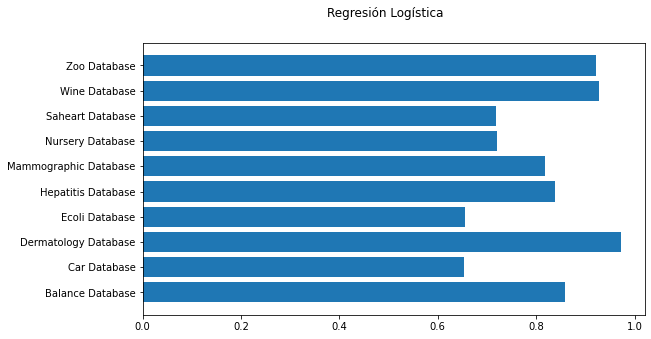

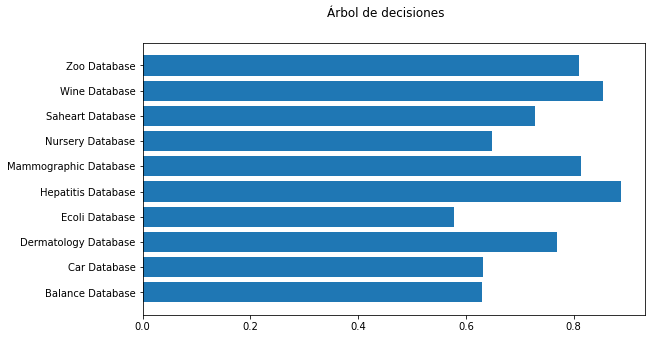

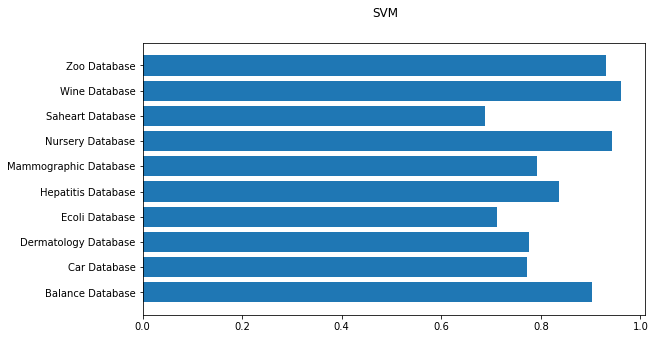

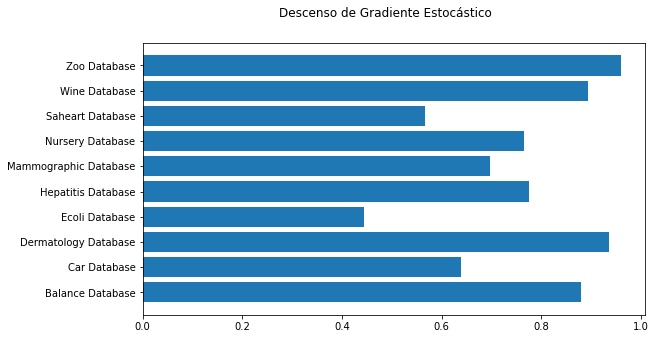

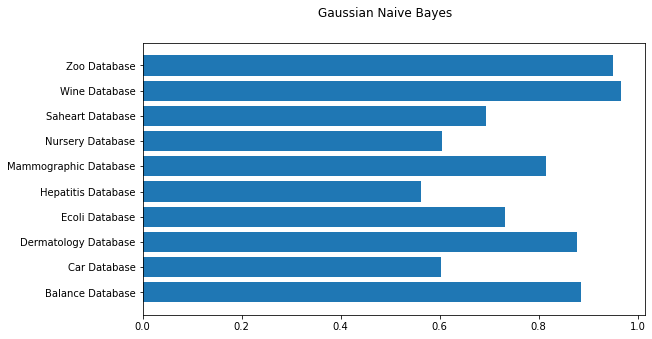

In [185]:
# REGRESION LOGÍSTICA
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, LR_list )
fig.suptitle('Regresión Logística')

# ARBOLES DE DECISIONES
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, CART_list )
fig.suptitle('Árbol de decisiones')

# SVM
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, SVM_list )
fig.suptitle('SVM')

# SGD
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, SGD_list )
fig.suptitle('Descenso de Gradiente Estocástico')

# Bayes
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, NB_list )
fig.suptitle('Gaussian Naive Bayes')


Text(0.5, 0.98, 'Gaussian Naive Bayes')

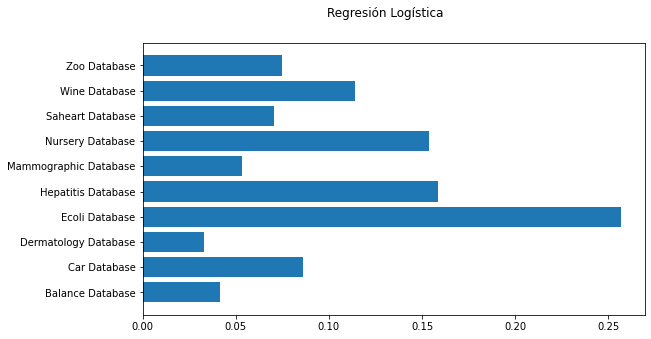

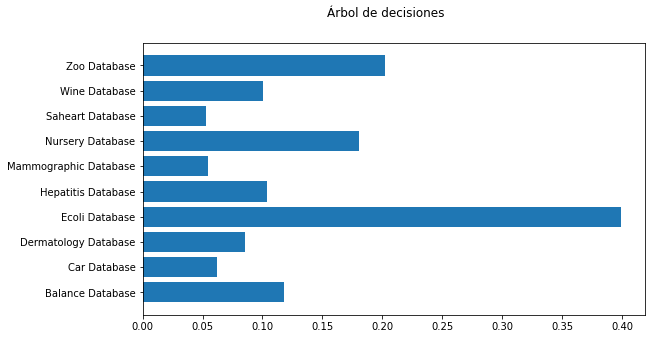

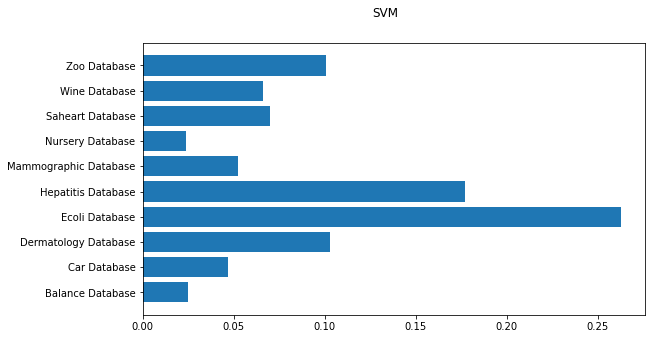

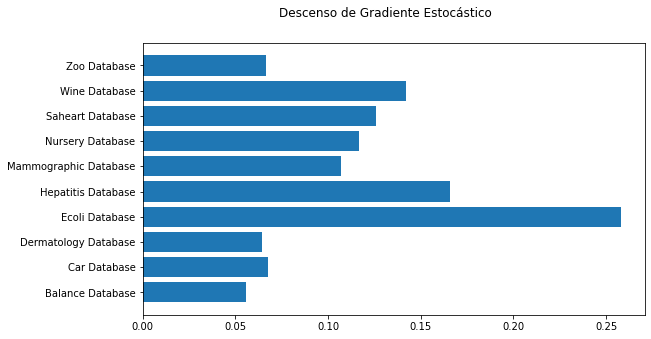

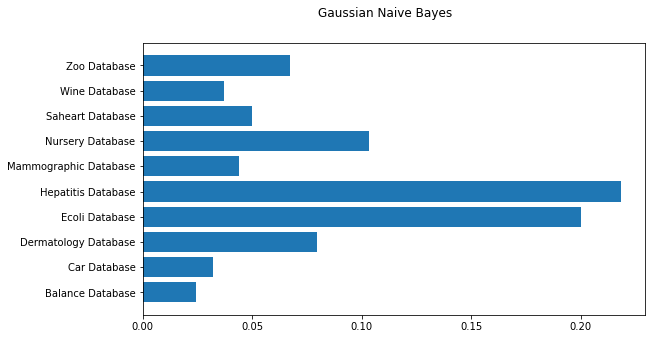

In [186]:
# REGRESION LOGÍSTICA
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, LR_list2 )
fig.suptitle('Regresión Logística')

# ARBOLES DE DECISIONES
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, CART_list2 )
fig.suptitle('Árbol de decisiones')

# SVM
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, SVM_list2 )
fig.suptitle('SVM')

# SGD
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, SGD_list2 )
fig.suptitle('Descenso de Gradiente Estocástico')

# Bayes
fig, axs = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
axs.barh(db_names, NB_list2 )
fig.suptitle('Gaussian Naive Bayes')